# EDA for the superstore dataset

## Import Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

## Import Dataset

In [2]:
df = pd.read_csv("./Sample-Superstore.csv", encoding='windows-1252')

## Dataset Info

In [6]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [7]:
df.shape # number of rows and cols

(9994, 21)

In [8]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

so, we have a list of sale records, each row represents a client buying quantity of a product paying "Sales" with discount and profit, and we also have some info about the customer and the product, like the city, state, segment, and category and sub-category ... etc.

In [ ]:
df = df.drop(columns=['Row ID', 'Order ID', 'Postal Code']) # we don't need these columns

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,9994.0,229.858001,623.245101,0.444,17.28000,54.4900,209.940,22638.480
Quantity,9994.0,3.789574,2.225110,1.000,2.00000,3.0000,5.000,14.000
Discount,9994.0,0.156203,0.206452,0.000,0.00000,0.2000,0.200,0.800
Profit,9994.0,28.656896,234.260108,-6599.978,1.72875,8.6665,29.364,8399.976


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order Date     9994 non-null   object 
 1   Ship Date      9994 non-null   object 
 2   Ship Mode      9994 non-null   object 
 3   Customer ID    9994 non-null   object 
 4   Customer Name  9994 non-null   object 
 5   Segment        9994 non-null   object 
 6   Country        9994 non-null   object 
 7   City           9994 non-null   object 
 8   State          9994 non-null   object 
 9   Region         9994 non-null   object 
 10  Product ID     9994 non-null   object 
 11  Category       9994 non-null   object 
 12  Sub-Category   9994 non-null   object 
 13  Product Name   9994 non-null   object 
 14  Sales          9994 non-null   float64
 15  Quantity       9994 non-null   int64  
 16  Discount       9994 non-null   float64
 17  Profit         9994 non-null   float64
dtypes: float

we can see that there's only 4 numrical values, the rest are categorial. 

Let's check null values

In [15]:
df.isna().sum().sum() # we don't have null values, that's great.

np.int64(0)

## Product-level KPI analysis (Sales, Quantity, Profit)

Top Selling products based on sales

In [12]:
TopSalesProduct = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False)
TopSalesProduct.head()

Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
Name: Sales, dtype: float64

but this doesn't mean it sells a lot, it might mean it's just expensive, so we may better use the quantity column to determine which product sells the most.

In [13]:
TopQuantityProduct = df.groupby('Product Name')['Quantity'].sum().sort_values(ascending=False)
TopQuantityProduct.head()

Product Name
Staples                       215
Staple envelope               170
Easy-staple paper             150
Staples in misc. colors        86
KI Adjustable-Height Table     74
Name: Quantity, dtype: int64

But what product actually generates most profit ?

In [14]:
TopProfitProduct = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False)
TopProfitProduct.head()

Product Name
Canon imageCLASS 2200 Advanced Copier                                          25199.9280
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind     7753.0390
Hewlett Packard LaserJet 3310 Copier                                            6983.8836
Canon PC1060 Personal Laser Copier                                              4570.9347
HP Designjet T520 Inkjet Large Format Printer - 24" Color                       4094.9766
Name: Profit, dtype: float64

## Category-level KPI analysis

Text(0.5, 1.0, 'Top Selling Categories')

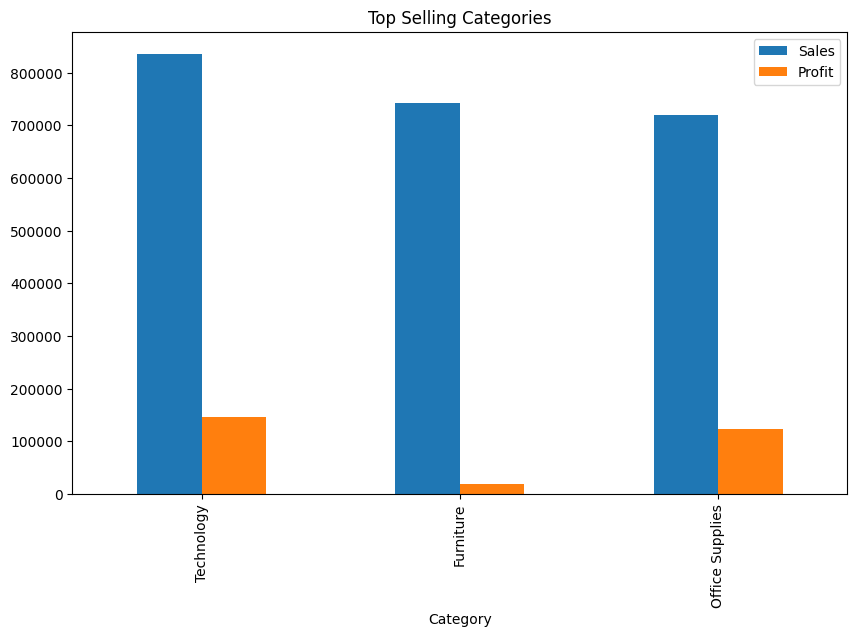

In [ ]:
# Categories Sales and profit
TopSalesCategory = df.groupby('Category')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)
TopSalesCategory.plot(kind='bar', figsize=(10,6))


We can see that furnitre generate more revenue than office supplies,
but actullay office supplies generates way more profit.

<Axes: xlabel='Sub-Category'>

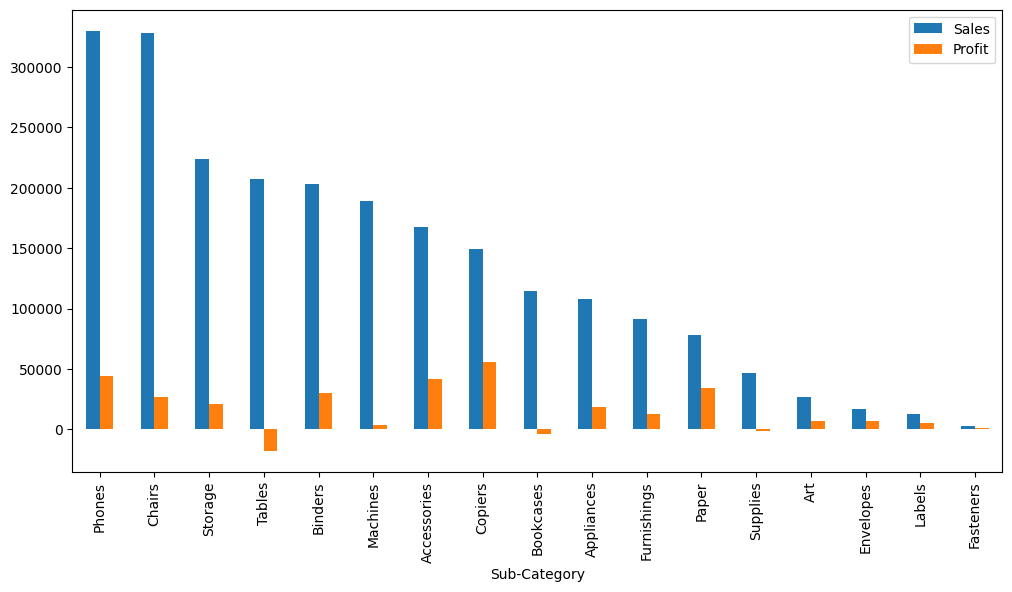

In [20]:
# Top Selling Sub-Categories
TopSalesSubCategory = df.groupby('Sub-Category')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)
TopSalesSubCategory.plot(kind='bar', figsize=(12,6))


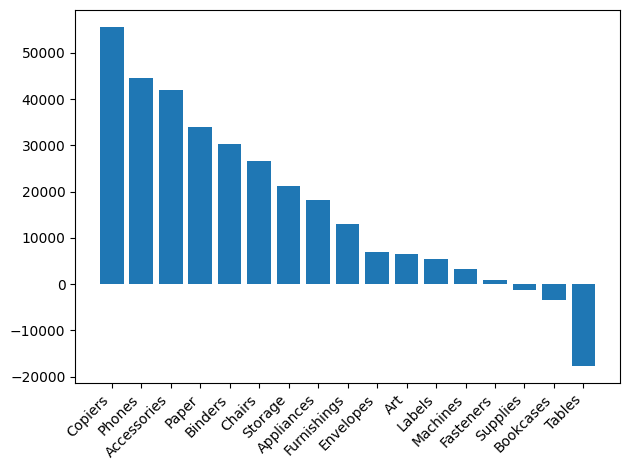

In [18]:
# Top Profit Sub-Categories
TopProfitSubCategory = df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False)
fig, ax = plt.subplots();
ax.bar(TopProfitSubCategory.index, TopProfitSubCategory.values)
ax.set_xticklabels(TopProfitSubCategory.index, rotation=45, ha='right')
plt.tight_layout()
plt.show()

Supplies, Bookcases, and tables actually lose not profit, while copiers, phones, and accessories generate the heighst profit.

## Region-level KPI analysis

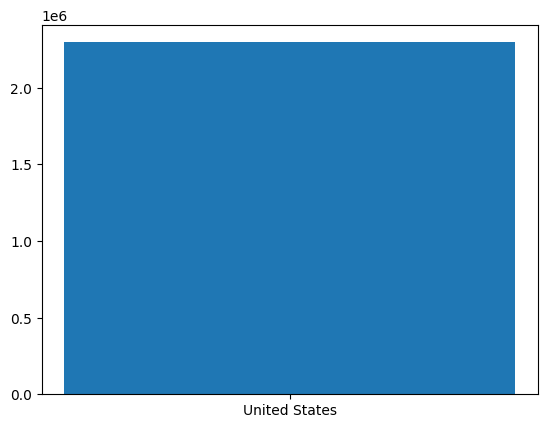

In [19]:
# Top Selling Country
TopSalesCountry = df.groupby('Country')['Sales'].sum().sort_values(ascending=False)
fig, ax = plt.subplots();
ax.bar(TopSalesCountry.index, TopSalesCountry.values)
plt.show()

The only country we have in the data is the US.

<Axes: xlabel='Region'>

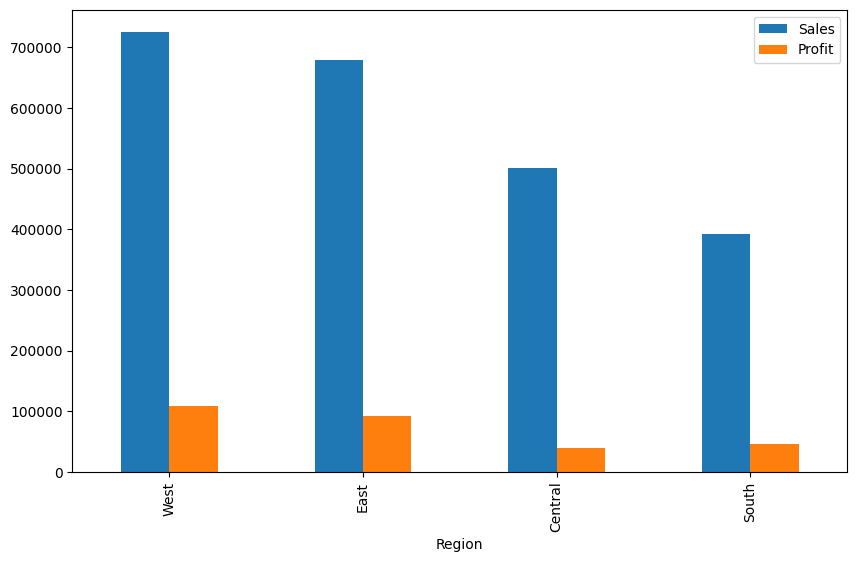

In [23]:
# Top Selling Regions
TopSalesRegion = df.groupby('Region')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)
TopSalesRegion.plot(kind='bar', figsize=(10,6))

<Axes: xlabel='State'>

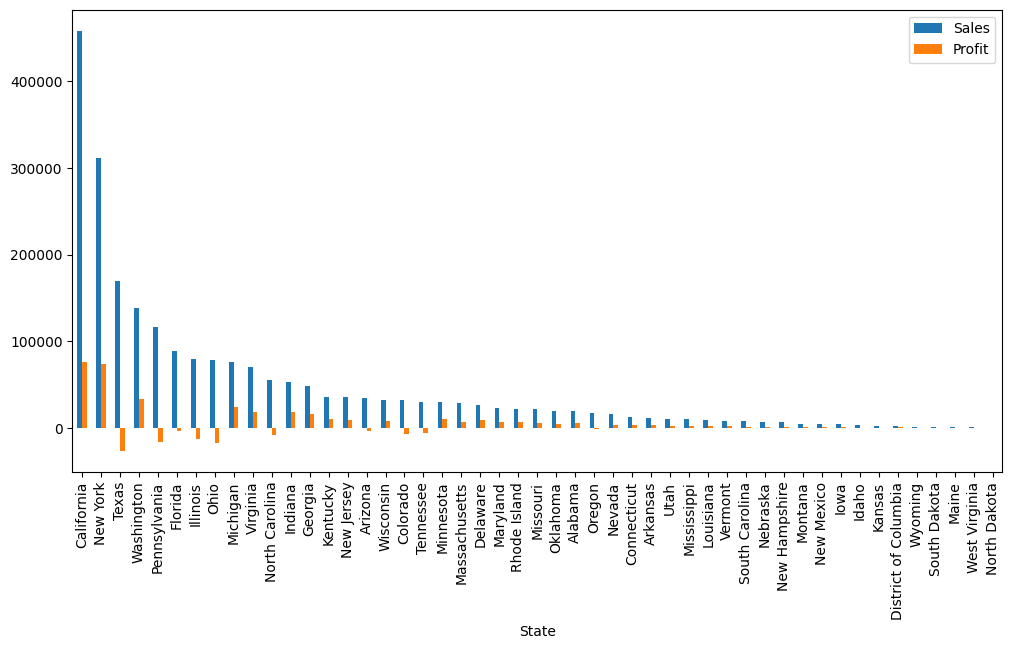

In [24]:
# Top Selling States
TopSalesState = df.groupby('State')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)
TopSalesState.plot(kind='bar', figsize=(12,6))


# Date Based KPIs

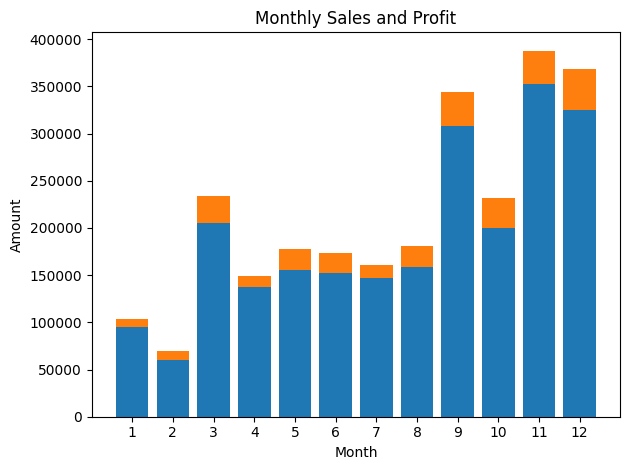

In [ ]:
# sales in each month
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Month'] = df['Order Date'].dt.month
monthly_sales = df.groupby(['Month'])[['Sales', 'Profit']].sum()

fig, ax = plt.subplots()
ax.bar(monthly_sales.index.astype(str), monthly_sales['Sales'], label='Sales')
ax.bar(monthly_sales.index.astype(str), monthly_sales['Profit'], label='Profit', bottom=monthly_sales['Sales'])
ax.set_xlabel('Month')
ax.set_ylabel('Amount')
ax.set_title('Monthly Sales and Profit')
ax.legend()
plt.tight_layout()
plt.show()

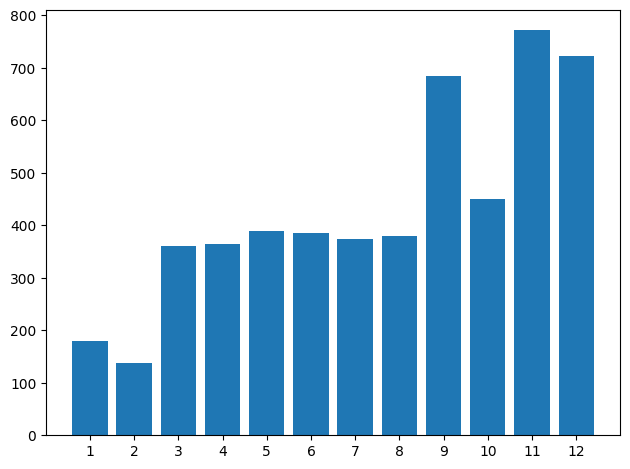

In [29]:
# number of discounts in each month
df['Discounted'] = df['Discount'] > 0
monthly_discounts = df.groupby('Month')['Discounted'].sum()
fig, ax = plt.subplots()
ax.bar(monthly_discounts.index.astype(str), monthly_discounts.values)
plt.tight_layout()
plt.show()

We can observe that months with higher discounts tend to generate higher sales.

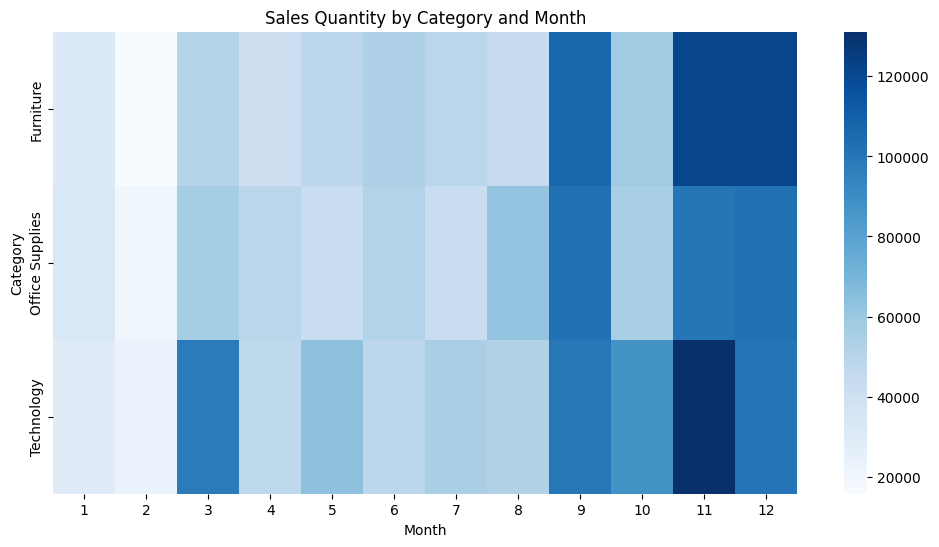

In [30]:
# Most sold product/category every month
p = df.groupby(['Month', 'Category'])['Sales'].sum().reset_index().pivot(index='Category', columns='Month', values='Sales')
plt.figure(figsize=(12,6))
sns.heatmap(p, annot=False, cmap='Blues')
plt.title('Sales Quantity by Category and Month')
plt.show()

# Profit Margin

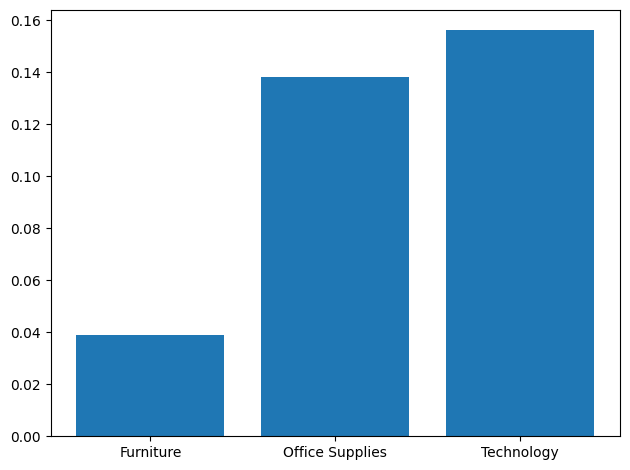

In [54]:
# What is the average profit margin for each product category?
df['Profit Margin'] = df['Profit'] / df['Sales']
avg_profit_margin = df.groupby('Category')['Profit Margin'].mean()
fig, ax = plt.subplots()
ax.bar(avg_profit_margin.index, avg_profit_margin.values)
plt.tight_layout()
plt.show()

Thank you